In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df= pd.read_csv('Churn_Modelling.csv')

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
X= df.iloc[:, 3:13]
Y= df.iloc[:, 13]

## Create dummy valriables

In [70]:
geography= pd.get_dummies(df['Geography'],drop_first=True)
gender= pd.get_dummies(df['Gender'],drop_first=True)

In [71]:
X= pd.concat([X,geography,gender],axis=1)

In [72]:
X= X.drop(['Geography','Gender'],axis=1)

### train test split

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size= 0.2, random_state= 0)

### Feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [77]:
clasifier= Sequential()

In [78]:
clasifier.add(Dense(output_dim= 6, init= 'he_uniform', activation= 'relu',input_dim=11))

/Users/anshulsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


### warning because it says that Keras has updated and name of output_dim, and init has been changed. 

In [101]:
clasifier.add(Dense(units= 10, kernel_initializer= 'he_uniform', activation= 'relu',input_dim=11))

In [102]:
clasifier.add(Dense(units= 20, kernel_initializer= 'he_uniform', activation= 'relu'))

In [103]:
clasifier.add(Dense(units= 15, kernel_initializer= 'he_uniform', activation= 'relu',input_dim=11))

In [121]:
clasifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation= 'relu'))

In [122]:
clasifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_20 (Dense)             (None, 20)               

/Users/anshulsharma/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [123]:
clasifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
model_history= clasifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10,epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 371us/step - loss: 0.3323 - accuracy: 0.8668 - val_loss: 0.4029 - val_accuracy: 0.8546
Epoch 2/100
5359/5359 [==============================] - 1s 269us/step - loss: 0.3281 - accuracy: 0.8655 - val_loss: 0.4103 - val_accuracy: 0.8501
Epoch 3/100
5359/5359 [==============================] - 2s 299us/step - loss: 0.3221 - accuracy: 0.8660 - val_loss: 0.3725 - val_accuracy: 0.8531
Epoch 4/100
5359/5359 [==============================] - 2s 353us/step - loss: 0.3201 - accuracy: 0.8660 - val_loss: 0.3803 - val_accuracy: 0.8497
Epoch 5/100
5359/5359 [==============================] - 2s 309us/step - loss: 0.3207 - accuracy: 0.8656 - val_loss: 0.3690 - val_accuracy: 0.8466
Epoch 6/100
5359/5359 [==============================] - 2s 296us/step - loss: 0.3208 - accuracy: 0.8660 - val_loss: 0.3723 - val_accuracy: 0.8535
Epoch 7/100
5359/5359 [==============================] - 1s 267us/step

5359/5359 [==============================] - 1s 274us/step - loss: 0.3178 - accuracy: 0.8645 - val_loss: 0.4007 - val_accuracy: 0.8527
Epoch 57/100
5359/5359 [==============================] - 1s 273us/step - loss: 0.3167 - accuracy: 0.8679 - val_loss: 0.3736 - val_accuracy: 0.8504
Epoch 58/100
5359/5359 [==============================] - 1s 275us/step - loss: 0.3173 - accuracy: 0.8656 - val_loss: 0.3879 - val_accuracy: 0.8531
Epoch 59/100
5359/5359 [==============================] - 1s 271us/step - loss: 0.3169 - accuracy: 0.8630 - val_loss: 0.3875 - val_accuracy: 0.8531
Epoch 60/100
5359/5359 [==============================] - 1s 275us/step - loss: 0.3163 - accuracy: 0.8664 - val_loss: 0.3733 - val_accuracy: 0.8516
Epoch 61/100
5359/5359 [==============================] - 2s 343us/step - loss: 0.3163 - accuracy: 0.8640 - val_loss: 0.3906 - val_accuracy: 0.8531
Epoch 62/100
5359/5359 [==============================] - 2s 342us/step - loss: 0.3168 - accuracy: 0.8658 - val_loss: 0.3709 

In [90]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [108]:
y_pred= clasifier.predict(X_test)
y_pred= (y_pred> 0.5)

In [109]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [110]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_pred)
cm

array([[1514,   81],
       [ 203,  202]])

In [111]:
from sklearn.metrics import accuracy_score
ac= accuracy_score(Y_test,y_pred)
ac

0.858

In [116]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


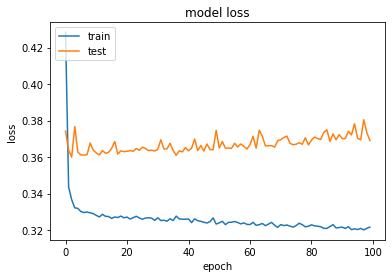

In [115]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


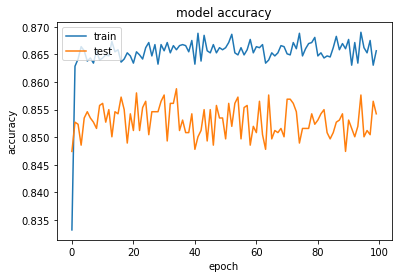

In [120]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [128]:
result = clasifier.predict(scaler.transform(X))
result

array([[0.276391  ],
       [0.22780368],
       [1.0077403 ],
       ...,
       [0.25042725],
       [0.20364541],
       [0.06954916]], dtype=float32)

In [129]:
arr= result.flatten()

In [130]:
df['rating']= arr

In [133]:
df.sort_values('rating',ascending=True).head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,rating
8322,8323,15584899,Siciliani,617,France,Female,35,5,0.0,2,0,1,13066.30,0,0.018636
2538,2539,15752838,Lucas,723,Spain,Male,38,6,0.0,2,1,1,94415.60,0,0.018637
5862,5863,15656484,Woods,682,France,Male,40,4,0.0,2,1,1,140745.91,0,0.018637
1464,1465,15595067,Zhirov,637,Spain,Female,40,6,0.0,2,1,1,181610.60,0,0.018637
5554,5555,15784218,Mason,620,Spain,Male,38,0,0.0,2,1,1,38015.34,0,0.018637
7006,7007,15660390,Boyle,544,France,Female,33,6,0.0,2,1,1,124113.04,0,0.018638
6990,6991,15648725,Sinclair,660,France,Male,41,3,0.0,2,1,1,108665.89,0,0.018638
4379,4380,15808831,Dale,669,France,Male,29,7,0.0,2,1,1,138145.62,0,0.018638
5951,5952,15590637,Ahmed,721,France,Male,41,7,0.0,2,0,1,61018.85,0,0.018638
5714,5715,15604158,Smith,554,France,Female,39,10,0.0,2,1,1,18391.93,0,0.018639
